In [1]:
import root_numpy as rn
import ROOT as r
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


/disk/lhcb_data2/davide/miniconda3/envs/root_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.17.2 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:

file_name='B2Dmunu'
file_path='/disk/lhcb_data2/davide/HCAL_project_full_event/'+file_name+'.root'
tree_name='Bd2Dmu/DecayTree'



In [3]:
#r.TBrowser()

In [4]:
f = r.TFile(file_path)
t = f.Get(tree_name)
j=t.GetEntries()

In [18]:
j

3

In [20]:
batch_size=20000
n_batches=1
#N = j
#n_batches= N//batch_size

In [21]:
particle = 'K'
variable = 'ET'

cal_zone = 'inner'

cellsET_inner_dict={}

for j in range(n_batches):
    cellsET_inner_dict[j]=rn.root2array(
        filenames=file_path, 
        treename=tree_name,
        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,#"B0_L0HadronDecision_TOS","B0_L0HadronDecision_TIS"],
        start=j*batch_size,
        stop=(j+1)*batch_size,
    )
    
    cellsET_inner_dict[j]=np.array([cellsET_inner_dict[j][i] for i in range(batch_size)])
    #np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j), cellsET_inner_dict[j])

#if N % batch_size != 0:
#    
#    cellsET_inner_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,# "B0_L0HadronDecision_TOS","B0_L0HadronDecision_TIS"],
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsET_inner_dict[j+1]=np.array([cellsET_inner_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsET_inner_dict[j+1])
    
particle = 'K'
variable = 'ET'

cal_zone='outer'

cellsET_outer_dict ={}

for j in range(n_batches):
    cellsET_outer_dict[j]=rn.root2array(
        filenames=file_path, 
        treename=tree_name,
        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,# "B0_L0HadronDecision_TOS","B0_L0HadronDecision_TIS"],
        start=j*batch_size,
        stop=(j+1)*batch_size,
    )
    cellsET_outer_dict[j]=np.array([cellsET_outer_dict[j][i] for i in range(batch_size)])
    #np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j),  cellsET_outer_dict[j])

#if N % batch_size != 0:
#    
#    cellsET_outer_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,# "B0_L0HadronDecision_TOS","B0_L0HadronDecision_TIS"],
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsET_outer_dict[j+1]=np.array([cellsET_outer_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1),  cellsET_outer_dict[j+1]) 

In [22]:
particle='K'
L0Calo_HCAL_TriggerET ={}

for j in range(n_batches):
    L0Calo_HCAL_TriggerET[j]=rn.root2array(
        filenames=file_path, 
        treename=tree_name,
        branches=particle+'_L0Calo_HCAL_TriggerET',
        start=j*batch_size,
        stop=(j+1)*batch_size,
    )
    L0Calo_HCAL_TriggerET[j]=np.array([L0Calo_HCAL_TriggerET[j][i] for i in range(batch_size)])
    #np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j),  cellsET_outer_dict[j])


In [23]:
(L0Calo_HCAL_TriggerET[0]<0).sum()

6577

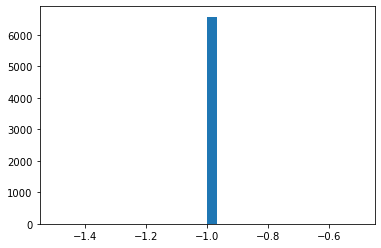

In [24]:
plt.hist(L0Calo_HCAL_TriggerET[0][L0Calo_HCAL_TriggerET[0]<0],bins=30);

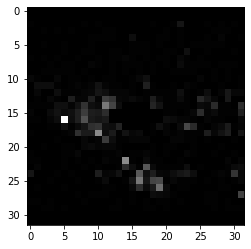

In [28]:
batch=0
n=10
plt.imshow(cellsET_inner_dict[batch][n],cmap='gray')

In [32]:
cellsET_inner_dict[batch][n]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [24.,  0.,  0., ...,  0., 24.,  0.],
       ...,
       [ 0.,  0., 24., ..., 24., 24., 24.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

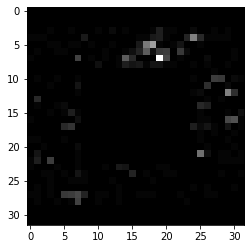

In [27]:
batch=0
n=3
plt.imshow(cellsET_outer_dict[batch][n],cmap='gray')

In [15]:
for j in range(n_batches):

    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_inner/batch_'+str(j), cellsET_inner_dict[j])
    #np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsET_inner_dict[j+1])

    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_outer/batch_'+str(j),  cellsET_outer_dict[j])
    #np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1),  cellsET_outer_dict[j+1]) 



In [13]:
#particle = 'piplus'
#cal_zone = 'inner'
#variable = 'X'
#
#cellsX_inner_dict={}
#
#for j in range(n_batches):
#    cellsX_inner_dict[j]=rn.root2array(
#        filenames=file_path, 
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=j*batch_size,
#        stop=(j+1)*batch_size,
#    )
#    
#    cellsX_inner_dict[j]=np.array([cellsX_inner_dict[j][i] for i in range(batch_size)])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j), cellsX_inner_dict[j])
#
#if N % batch_size != 0:
#    
#    cellsX_inner_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsX_inner_dict[j+1]=np.array([cellsX_inner_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsX_inner_dict[j+1])
#    
#variable = 'Y'
#
#cellsY_inner_dict ={}
#
#for j in range(n_batches):
#    cellsY_inner_dict[j]=rn.root2array(
#        filenames=file_path, 
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=j*batch_size,
#        stop=(j+1)*batch_size,
#    )
#    cellsY_inner_dict[j]=np.array([cellsY_inner_dict[j][i] for i in range(batch_size)])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j), cellsY_inner_dict[j])
#
#if N % batch_size != 0:
#    
#    cellsY_inner_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsY_inner_dict[j+1]=np.array([cellsY_inner_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsY_inner_dict[j+1])

#particle = 'piplus'
#cal_zone = 'outer'
#variable = 'X'
#
#cellsX_outer_dict={}
#
#for j in range(n_batches):
#    cellsX_outer_dict[j]=rn.root2array(
#        filenames=file_path, 
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=j*batch_size,
#        stop=(j+1)*batch_size,
#    )
#    
#    cellsX_outer_dict[j]=np.array([cellsX_outer_dict[j][i] for i in range(batch_size)])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j), cellsX_outer_dict[j])
#
#if N % batch_size != 0:
#    
#    cellsX_outer_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsX_outer_dict[j+1]=np.array([cellsX_outer_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsX_outer_dict[j+1])
#    
#variable = 'Y'
#
#cellsY_outer_dict ={}
#
#for j in range(n_batches):
#    cellsY_outer_dict[j]=rn.root2array(
#        filenames=file_path, 
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=j*batch_size,
#        stop=(j+1)*batch_size,
#    )
#    cellsY_outer_dict[j]=np.array([cellsY_outer_dict[j][i] for i in range(batch_size)])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j), cellsY_outer_dict[j])
#
#if N % batch_size != 0:
#    
#    cellsY_outer_dict[j+1]=rn.root2array(
#        filenames=file_path,
#        treename=tree_name,
#        branches=particle+'_L0Calo_HCAL_Cells'+variable+'_'+cal_zone,
#        start=n_batches*batch_size,
#        stop=N,
#    ) 
#    cellsY_outer_dict[j+1]=np.array([cellsY_outer_dict[j+1][i] for i in range((N % batch_size))])
#    np.save('/disk/lhcb_data/davide/HCAL_project_full_event/npy/'+file_name+'/'+variable+'_'+cal_zone+'/batch_'+str(j+1), cellsY_outer_dict[j+1]) 